# **Importing Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as mp
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import tensorflow as tf


# **Importing Datasets**

In [2]:
train = pd.read_csv('Resources/train.csv')
stores = pd.read_csv('Resources/stores.csv')
features = pd.read_csv('Resources/features.csv')

test = pd.read_csv('Resources/test.csv')


In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# **Data Prep**

In [6]:
DataTrain = train.merge(features,how='left',indicator=True).merge(stores,how='left')
DataTrain.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315


In [7]:
test = test.merge(features,how='left',indicator=True).merge(stores,how='left')
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,both,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,both,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,both,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,both,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,both,A,151315


In [8]:
DataTrain.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
_merge               0
Type                 0
Size                 0
dtype: int64

In [9]:
# MARK downs has a lot of null for this model we will drop this column and might come back to see if this does change anything as well as '_merge'
DataTrain_mark =DataTrain.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','_merge'],axis=1)
test =test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','_merge'],axis=1)
DataTrain_mark.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [10]:
# Check weekly sales for outliners with negative values 
DataTrain_mark.loc[DataTrain_mark['Weekly_Sales']<=0] #outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,B,118221


In [11]:
DataTrain_outliners  =DataTrain_mark.loc[DataTrain_mark['Weekly_Sales']>0]
DataTrain_outliners.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [12]:
DataTrain_outliners['year'] = pd.DatetimeIndex(DataTrain_outliners['Date']).year #Separating year data.
DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_15612\3166447939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['year'] = pd.DatetimeIndex(DataTrain_outliners['Date']).year #Separating year data.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010


In [13]:
DataTrain_outliners['month'] = pd.DatetimeIndex(DataTrain_outliners['Date']).month #extract month data
DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_15612\499996352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['month'] = pd.DatetimeIndex(DataTrain_outliners['Date']).month #extract month data


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3


In [14]:
DataTrain_outliners.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
year              int32
month             int32
dtype: object

In [15]:
DataTrain_outliners['Date'] =   pd.to_datetime(DataTrain_outliners['Date'])

C:\Users\david\AppData\Local\Temp\ipykernel_15612\90191364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['Date'] =   pd.to_datetime(DataTrain_outliners['Date'])


In [16]:
for var in DataTrain_outliners:
    if DataTrain_outliners[var].dtypes == float:
        DataTrain_outliners[var]=DataTrain_outliners[var].astype(int)
        

C:\Users\david\AppData\Local\Temp\ipykernel_15612\4006816737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners[var]=DataTrain_outliners[var].astype(int)
C:\Users\david\AppData\Local\Temp\ipykernel_15612\4006816737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners[var]=DataTrain_outliners[var].astype(int)
C:\Users\david\AppData\Local\Temp\ipykernel_15612\4006816737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [17]:
DataTrain_outliners.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales             int32
IsHoliday                 bool
Temperature              int32
Fuel_Price               int32
CPI                      int32
Unemployment             int32
Type                    object
Size                     int64
year                     int32
month                    int32
dtype: object

In [18]:
DataTrain_outliners['week'] =  DataTrain_outliners['Date'].dt.isocalendar().week
DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_15612\3978361699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['week'] =  DataTrain_outliners['Date'].dt.isocalendar().week


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924,False,42,2,211,8,A,151315,2010,2,5
1,1,1,2010-02-12,46039,True,38,2,211,8,A,151315,2010,2,6
2,1,1,2010-02-19,41595,False,39,2,211,8,A,151315,2010,2,7
3,1,1,2010-02-26,19403,False,46,2,211,8,A,151315,2010,2,8
4,1,1,2010-03-05,21827,False,46,2,211,8,A,151315,2010,3,9


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

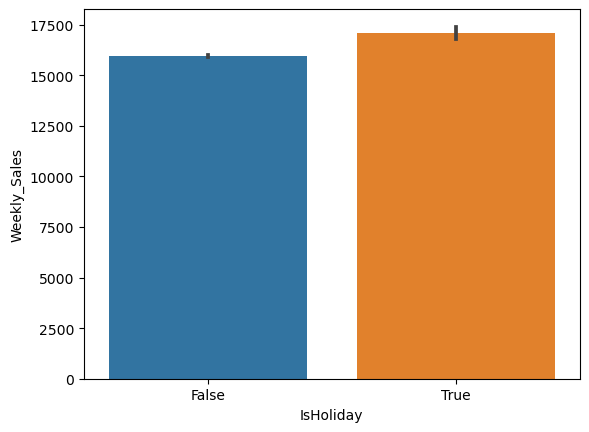

In [19]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=DataTrain_outliners)

In [20]:
df_holiday = DataTrain_outliners.loc[DataTrain_outliners['IsHoliday']==True]
df_holiday['Date'].nunique() 

10

In [21]:
df_not_holiday = DataTrain_outliners.loc[DataTrain_outliners['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

In [22]:
# Super bowl dates in train set
DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-02-12')|(DataTrain_outliners['Date'] == '2011-02-11')|(DataTrain_outliners['Date'] == '2012-02-10'),'Super_Bowl'] = True
DataTrain_outliners.loc[(DataTrain_outliners['Date'] != '2010-02-12')&(DataTrain_outliners['Date'] != '2011-02-11')&(DataTrain_outliners['Date'] != '2012-02-10'),'Super_Bowl'] = False

C:\Users\david\AppData\Local\Temp\ipykernel_15612\2482144801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-02-12')|(DataTrain_outliners['Date'] == '2011-02-11')|(DataTrain_outliners['Date'] == '2012-02-10'),'Super_Bowl'] = True
C:\Users\david\AppData\Local\Temp\ipykernel_15612\2482144801.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-02-12')|(DataTrain_outliners['Date'] == '2011-02-11')|(DataTrain_outliners['Date'] == '2012-02-10'),'Super_Bowl'] = 

In [23]:
# Labor day dates in train set
DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-09-10')|(DataTrain_outliners['Date'] == '2011-09-09')|(DataTrain_outliners['Date'] == '2012-09-07'),'Labor_Day'] = True
DataTrain_outliners.loc[(DataTrain_outliners['Date'] != '2010-09-10')&(DataTrain_outliners['Date'] != '2011-09-09')&(DataTrain_outliners['Date'] != '2012-09-07'),'Labor_Day'] = False


C:\Users\david\AppData\Local\Temp\ipykernel_15612\2571969952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-09-10')|(DataTrain_outliners['Date'] == '2011-09-09')|(DataTrain_outliners['Date'] == '2012-09-07'),'Labor_Day'] = True
C:\Users\david\AppData\Local\Temp\ipykernel_15612\2571969952.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-09-10')|(DataTrain_outliners['Date'] == '2011-09-09')|(DataTrain_outliners['Date'] == '2012-09-07'),'Labor_Day'] = Tr

In [24]:
# Thanksgiving dates in train set
DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-11-26')|(DataTrain_outliners['Date'] == '2011-11-25'),'Thanksgiving'] = True
DataTrain_outliners.loc[(DataTrain_outliners['Date'] != '2010-11-26')&(DataTrain_outliners['Date'] != '2011-11-25'),'Thanksgiving'] = False

C:\Users\david\AppData\Local\Temp\ipykernel_15612\1294592638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-11-26')|(DataTrain_outliners['Date'] == '2011-11-25'),'Thanksgiving'] = True
C:\Users\david\AppData\Local\Temp\ipykernel_15612\1294592638.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-11-26')|(DataTrain_outliners['Date'] == '2011-11-25'),'Thanksgiving'] = True


In [25]:
#Christmas dates in train set
DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-12-31')|(DataTrain_outliners['Date'] == '2011-12-30'),'Christmas'] = True
DataTrain_outliners.loc[(DataTrain_outliners['Date'] != '2010-12-31')&(DataTrain_outliners['Date'] != '2011-12-30'),'Christmas'] = False

C:\Users\david\AppData\Local\Temp\ipykernel_15612\1507395381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-12-31')|(DataTrain_outliners['Date'] == '2011-12-30'),'Christmas'] = True
C:\Users\david\AppData\Local\Temp\ipykernel_15612\1507395381.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  DataTrain_outliners.loc[(DataTrain_outliners['Date'] == '2010-12-31')|(DataTrain_outliners['Date'] == '2011-12-30'),'Christmas'] = True


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

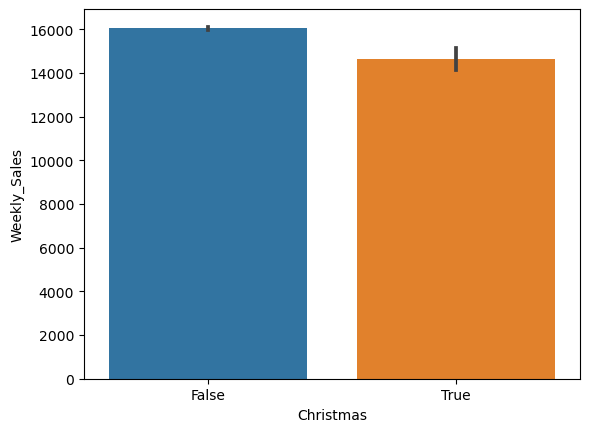

In [26]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=DataTrain_outliners) # Christmas holiday vs not-Christmas

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

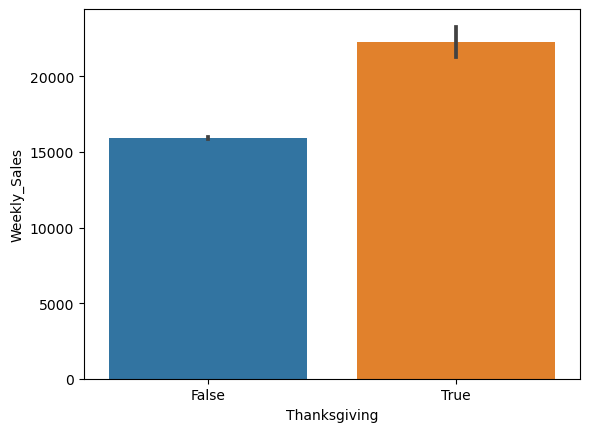

In [27]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=DataTrain_outliners) # Thanksgiving holiday vs not-thanksgiving

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

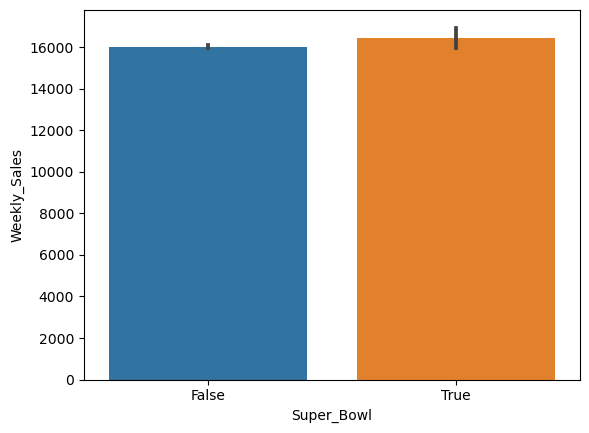

In [28]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=DataTrain_outliners) # Super bowl holiday vs not-super bowl

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

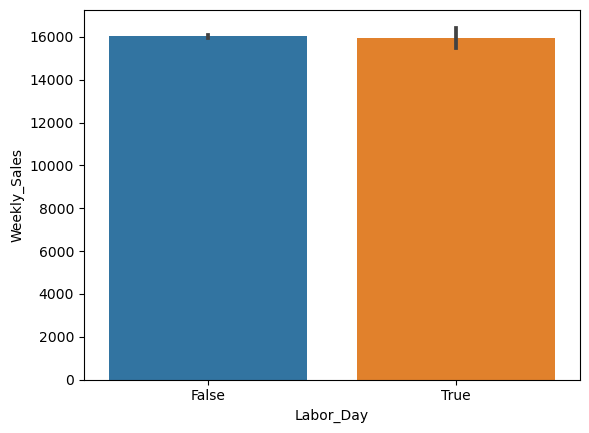

In [29]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=DataTrain_outliners) # Labor day holiday vs not-labor day

In [30]:
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()



# Encode labels in column 'species'.
DataTrain_outliners['IsHoliday']= label_encoder.fit_transform(DataTrain_outliners['IsHoliday'])
DataTrain_outliners['Type']= label_encoder.fit_transform(DataTrain_outliners['Type'])

DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_15612\1737466138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['IsHoliday']= label_encoder.fit_transform(DataTrain_outliners['IsHoliday'])
C:\Users\david\AppData\Local\Temp\ipykernel_15612\1737466138.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['Type']= label_encoder.fit_transform(DataTrain_outliners['Type'])


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924,0,42,2,211,8,0,151315,2010,2,5,False,False,False,False
1,1,1,2010-02-12,46039,1,38,2,211,8,0,151315,2010,2,6,True,False,False,False
2,1,1,2010-02-19,41595,0,39,2,211,8,0,151315,2010,2,7,False,False,False,False
3,1,1,2010-02-26,19403,0,46,2,211,8,0,151315,2010,2,8,False,False,False,False
4,1,1,2010-03-05,21827,0,46,2,211,8,0,151315,2010,3,9,False,False,False,False


                 Store      Dept      Date  Weekly_Sales  IsHoliday  \
Store         1.000000  0.024258  0.003159     -0.085117  -0.000522   
Dept          0.024258  1.000000  0.003993      0.148750   0.000663   
Date          0.003159  0.003993  1.000000     -0.000571  -0.012957   
Weekly_Sales -0.085117  0.148750 -0.000571      1.000000   0.012843   
IsHoliday    -0.000522  0.000663 -0.012957      0.012843   1.000000   
Temperature  -0.050153  0.004721  0.146725     -0.002365  -0.156000   
Fuel_Price    0.047181  0.004549  0.719674      0.001272  -0.024747   
CPI          -0.211178 -0.007155  0.077228     -0.021182  -0.001836   
Unemployment  0.207440  0.007836 -0.254648     -0.025516   0.013715   
Type          0.226352  0.003157  0.004090     -0.182230  -0.001000   
Size         -0.182763 -0.002491 -0.005122      0.244118   0.000797   
year          0.002831  0.003716  0.941465     -0.010015  -0.056572   
month         0.000907  0.000800  0.146420      0.028401   0.123058   
week  

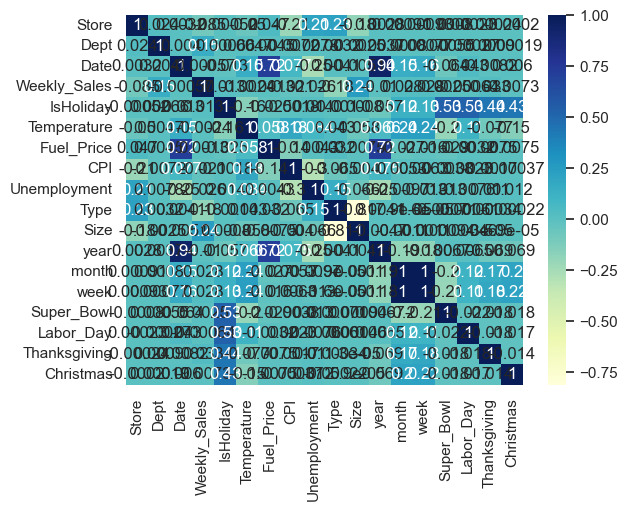

In [31]:
data = DataTrain_outliners

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

In [32]:
DataTrain_test =DataTrain_outliners.drop(['Date','Super_Bowl','Labor_Day','Thanksgiving','Christmas'],axis=1)

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050153   
Dept          0.024258  1.000000      0.148750   0.000663     0.004721   
Weekly_Sales -0.085117  0.148750      1.000000   0.012843    -0.002365   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.156000   
Temperature  -0.050153  0.004721     -0.002365  -0.156000     1.000000   
Fuel_Price    0.047181  0.004549      0.001272  -0.024747     0.058424   
CPI          -0.211178 -0.007155     -0.021182  -0.001836     0.183683   
Unemployment  0.207440  0.007836     -0.025516   0.013715     0.083694   
Type          0.226352  0.003157     -0.182230  -0.001000     0.043026   
Size         -0.182763 -0.002491      0.244118   0.000797    -0.058394   
year          0.002831  0.003716     -0.010015  -0.056572     0.065638   
month         0.000907  0.000800      0.028401   0.123058     0.235518   
week          0.000926  0.000767      

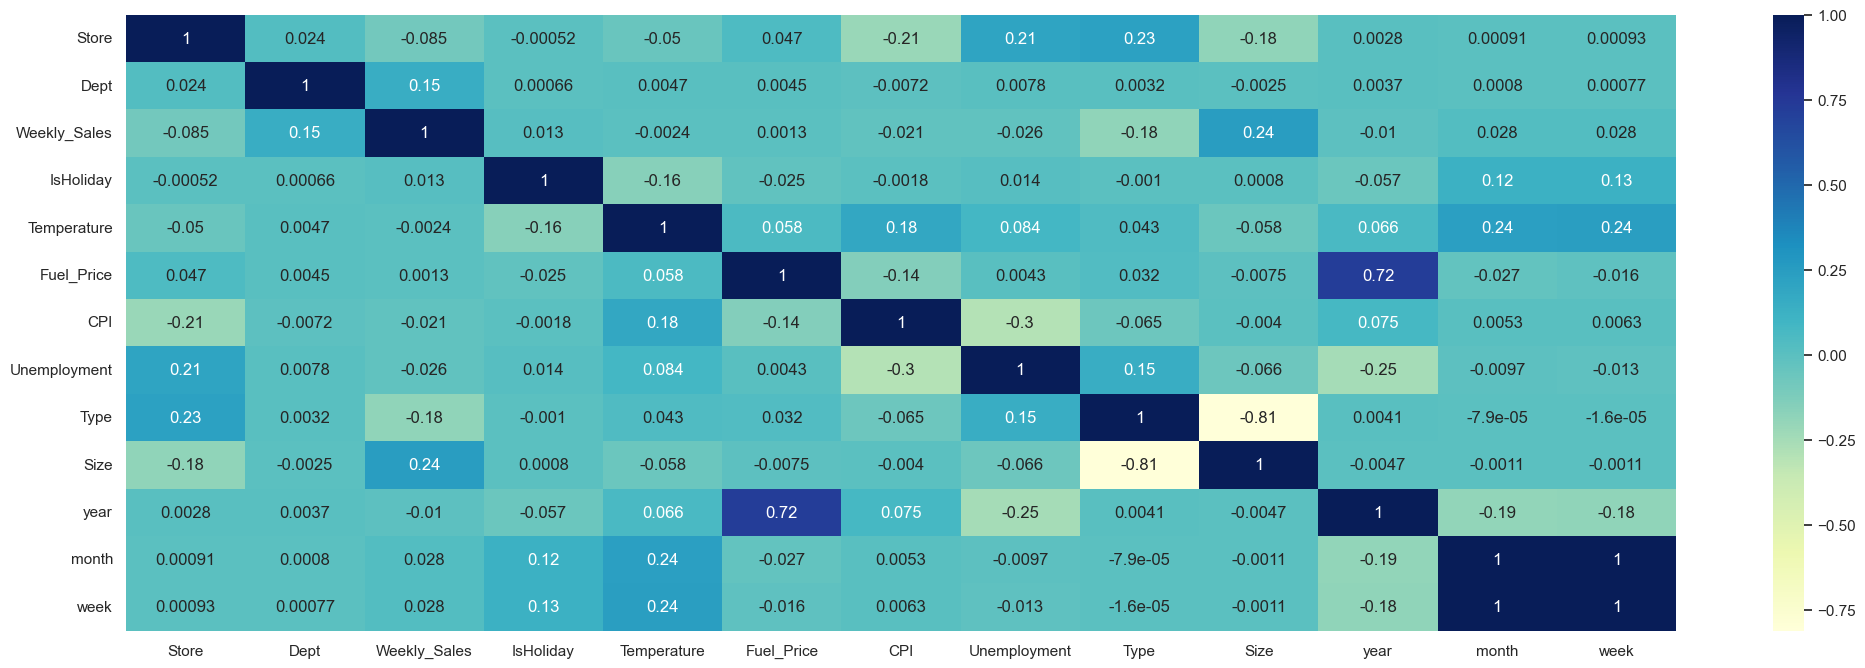

In [33]:
data1 = DataTrain_test

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data1.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

C:\Users\david\AppData\Local\Temp\ipykernel_15612\979720859.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1.Weekly_Sales)
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', T

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

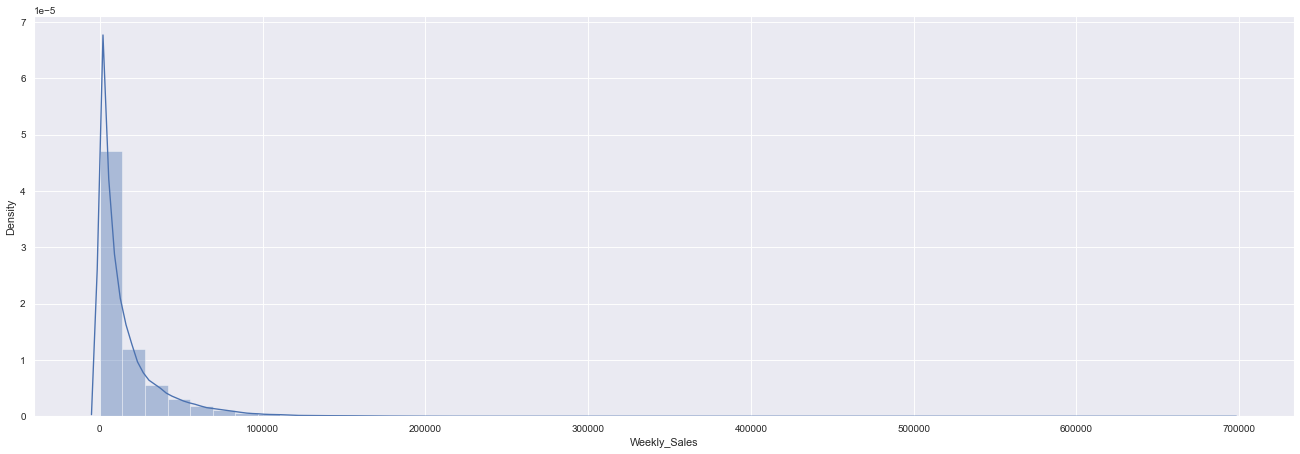

In [34]:
plt.figure(dpi=65)
sns.distplot(data1.Weekly_Sales)

<Axes: >

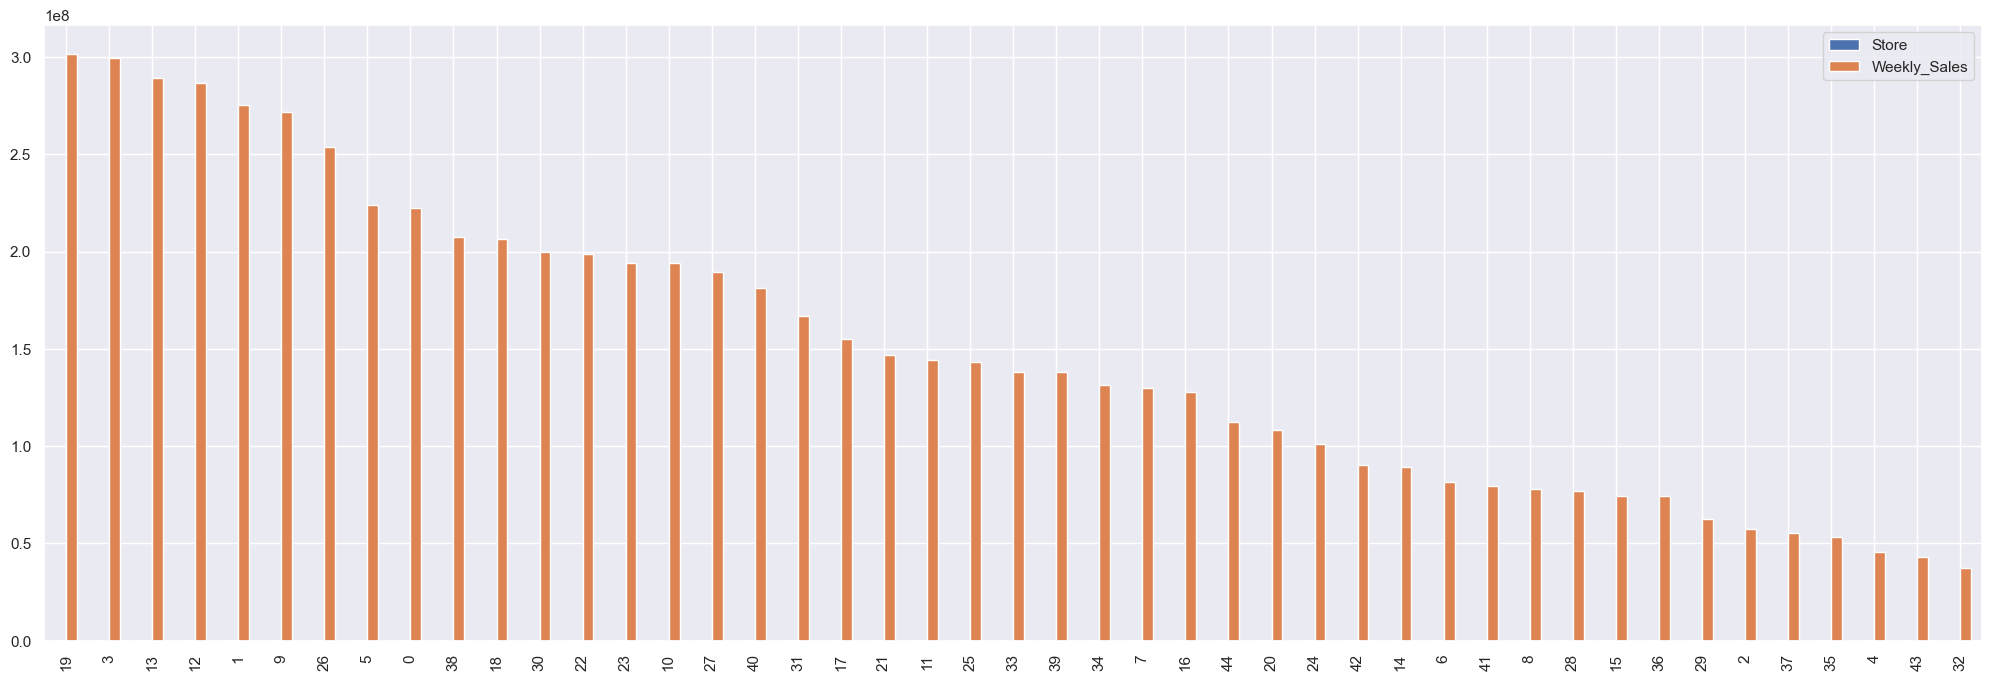

In [35]:
data1.groupby('Store').agg({'Weekly_Sales':"sum"}).reset_index().sort_values('Weekly_Sales', ascending=False).plot(kind='bar')

#train.plot(kind='barh',x='Weekly_Sales', y='Store', alpha=0.5)

In [36]:
data1.columns 

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'year', 'month',
       'week'],
      dtype='object')

In [37]:
data_test = data1

In [38]:
data_test.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924,0,42,2,211,8,0,151315,2010,2,5
1,1,1,46039,1,38,2,211,8,0,151315,2010,2,6
2,1,1,41595,0,39,2,211,8,0,151315,2010,2,7
3,1,1,19403,0,46,2,211,8,0,151315,2010,2,8
4,1,1,21827,0,46,2,211,8,0,151315,2010,3,9


In [39]:
#   train X= Exery thing except Weekly_Sales 
train_X=data_test.drop(['Weekly_Sales'], axis=1)

#  train Y= Only Weekly_Sales 
train_y=data_test['Weekly_Sales'] 
test_X= data1.drop(['Weekly_Sales'], axis=1)

train_X.shape, train_y.shape, test_X.shape

((420212, 12), (420212,), (420212, 12))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [41]:
lm = LinearRegression(n_jobs=-1)
lm.fit(train_X,train_y)

LinearRegression(n_jobs=-1)

In [42]:
train_X

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,0,42,2,211,8,0,151315,2010,2,5
1,1,1,1,38,2,211,8,0,151315,2010,2,6
2,1,1,0,39,2,211,8,0,151315,2010,2,7
3,1,1,0,46,2,211,8,0,151315,2010,2,8
4,1,1,0,46,2,211,8,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64,3,192,8,1,118221,2012,9,39
421566,45,98,0,64,3,192,8,1,118221,2012,10,40
421567,45,98,0,54,4,192,8,1,118221,2012,10,41
421568,45,98,0,56,3,192,8,1,118221,2012,10,42


In [43]:
train_y

0         24924
1         46039
2         41595
3         19403
4         21827
          ...  
421565      508
421566      628
421567     1061
421568      760
421569     1076
Name: Weekly_Sales, Length: 420212, dtype: int32

In [44]:
y_pred =lm.predict(test_X)
acc_lm = round(lm.score(train_X,train_y)* 100,2)
print('Accuracy of Linear Regression model: ' +str(acc_lm)+'%')

Accuracy of Linear Regression model: 8.71%


In [ ]:
%timeit
param_grid={'n_estimators':np.arange(21,101)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2,n_jobs=-1, verbose=50)
tree.fit(train_X,train_y)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


In [ ]:
tree.best_params_

In [ ]:
clf_rf = RandomForestRegressor(n_estimators=37, n_jobs=-1, verbose=5)
clf_rf.fit(train_X,train_y)
y_pred_rf = clf_rf.predict(test_X)
acc_rf = round(clf_rf.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest model: '+str(acc_rf) +'%')

In [ ]:
reg = DecisionTreeRegressor()
reg.fit(train_X,train_y)
y_pred_dt = reg.predict(test_X)
acc_dt = round(reg.score(train_X,train_y)*100,2)
print("Accuracy of Decision Tree Model: "+str(acc_dt)+'%')

In [ ]:
models = pd.DataFrame({'Model':['Linear Regression','Random Forest','Decision Tree'],
                      'Score':[acc_lm,acc_rf,acc_dt]})
models.sort_values(by='Score',ascending= False)

In [ ]:
submission = pd.DataFrame({
    'Store_Dept_Date': test.Store.astype(str)+'_'+ test.Dept.astype(str)+'_'+test.Date.astype(str),
    'Weekly_Sales_dt': y_pred_dt , 'Weekly_sales_rf' : y_pred_rf})
submission.to_csv('weekly_sales Predicted.csv',index=False)